<a href="https://colab.research.google.com/github/PuroshotamSingh/Ted-talk-views-prediction/blob/main/Ted_Talk_Views_Prediction_Puroshotam_Singh_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ted Talk Views Prediction**

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset and creating dataframe
df = pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

# Let's do some EDA.

In [3]:
# Printing shape of dataset

df.shape

(4005, 19)

* **No of records: 4005**
* **No of columns: 19**

In [4]:
# Basic info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o



## *   In our dataset, we have only 4 numerical columns and rest all columns are either categorical or they contains textual data.
## *   Out of 4 numerical columns, 1 is target variable.

# So, we need to create some numerical columns from columns of object dtype.



In [5]:
# First 5 rows of dataset

df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


# Let's check for null values.

In [6]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

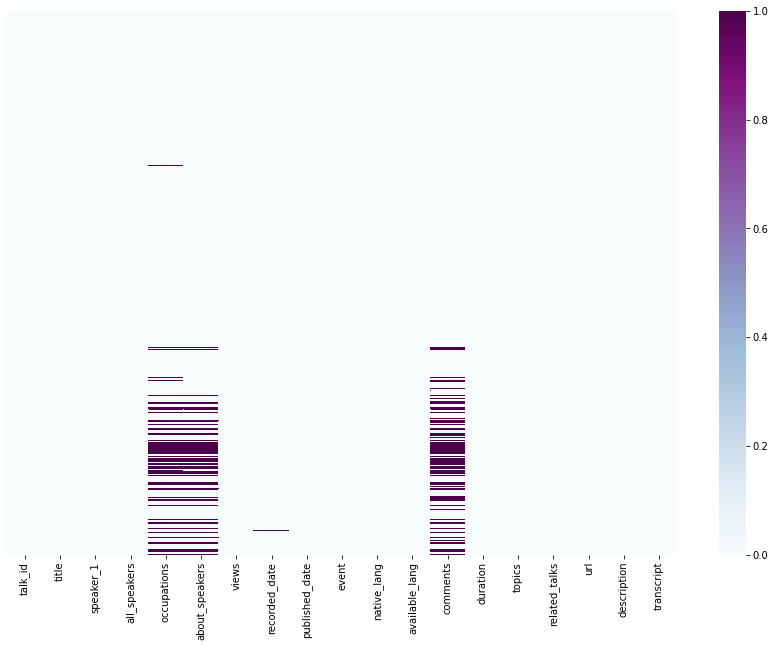

In [7]:
# Heatmap to check missing data in dataset

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [8]:
# Dropping url column as it is of no use

df = df.drop(columns=['url'])

## Let's check for duplicated rows.

In [9]:
df.duplicated().sum()

0

## Great! dataset does not contain any duplicate rows.

## Let's remove all_speakers, occupations, about_speakers columns from our dataset as they are not so important.

In [10]:
df = df.drop(['all_speakers', 'about_speakers', 'occupations'], axis=1)

In [11]:
# Checking total null values once again.

df.isna().sum()

talk_id             0
title               0
speaker_1           0
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

# **Let's explore some columns.**



*   ## Speaker_1 column

**Let's find most popular speaker.**



In [12]:
# Extracting most popular speaker.

pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


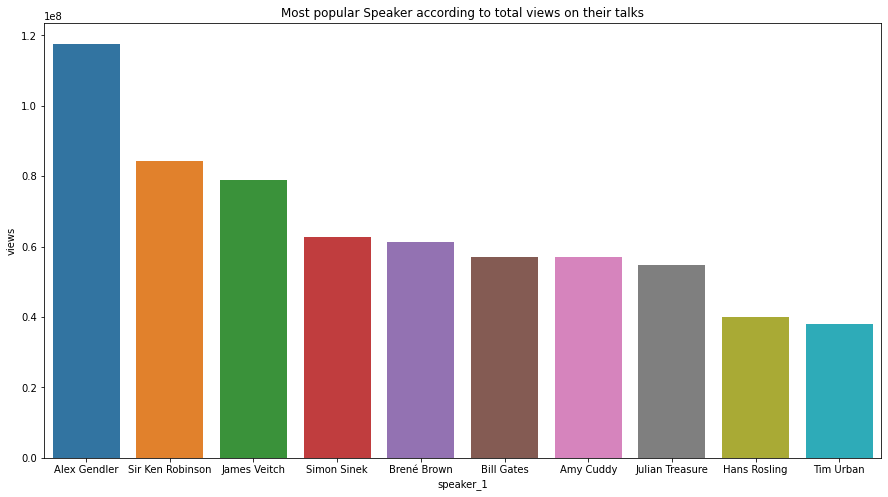

In [13]:
# Barplot to show top 10 popular speakers.

plt.figure(figsize=(15,8))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)



*   **Alex Gendler is the most popular speaker followed by Sir Ken Robinson and James Veitch.**





*   ## Event column



**Let's Check for unique event category in event column.**

In [14]:
# Printing the len of unique values in event column

len(df.event.unique())

459

* **We have 459 unique entries in event column**

**Let's find the most popular event category**

In [15]:
# Extracting top 5 popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_event_df.reset_index(inplace=True)

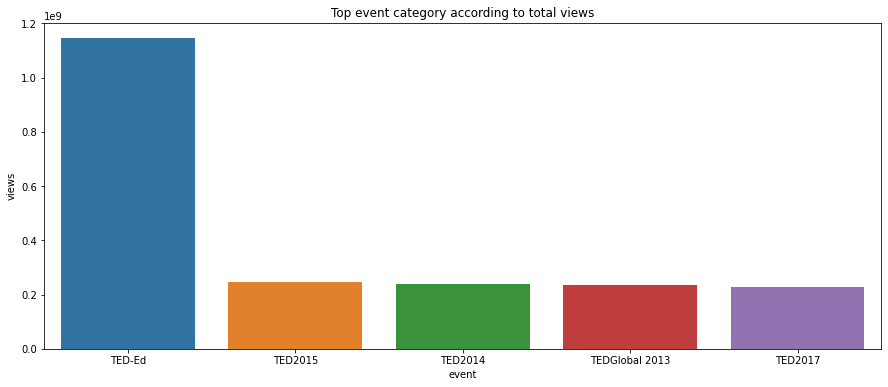

In [16]:
# Barplot to show top 5 popular event

plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

* **TED-Ed is the most popular event category having maximum number of views followed by TED2015.**



*   # native_lang column



In [17]:
# Value count of native_lang column

df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
pt          1
pt-br       1
de          1
zh-cn       1
ar          1
ko          1
it          1
Name: native_lang, dtype: int64

* **Approx 99% values in native_lang column is en.**
* **So, this column is of no use to us and we can remove this column.**

In [18]:
# Dropping the native_lang column

df.drop(columns='native_lang',inplace=True)



*  # Title column



##  **Let's find most frequent words in title and also visualize them.**

There are 157160 words in the combination of all titles.


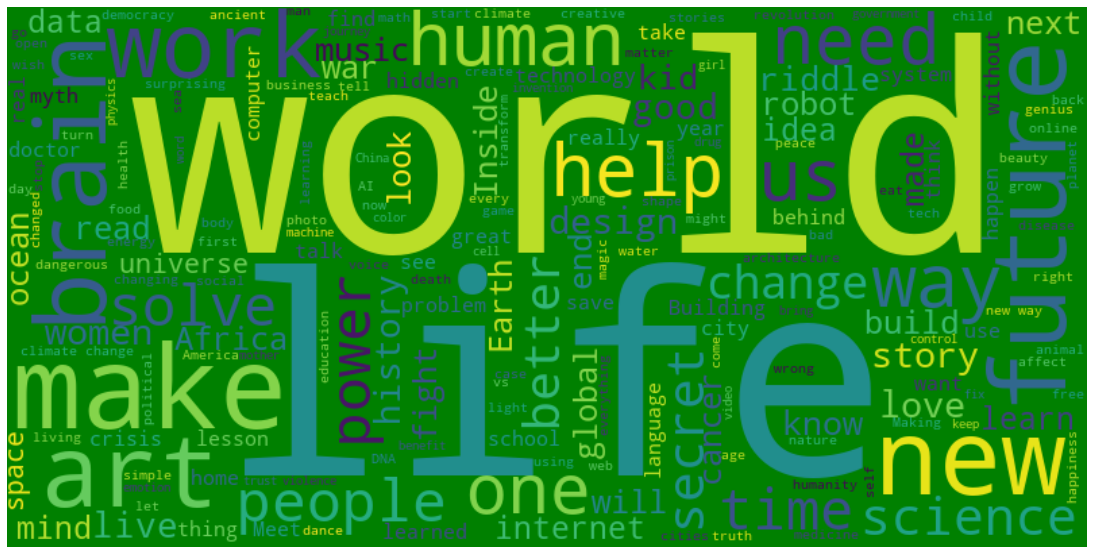

In [19]:
# Making of word cloud from title column

from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="green", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Majoriity of Titles contains words like life, world, make, new, future, art.** 



*   # published_date column



## published_date column is in string format so we need to first convert it into date time format

In [20]:
# Importing datetime library

import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [21]:
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4005, dtype: datetime64[ns]

## Let's extract weekday, month and year and add three separate columns as:


*   publish_day
*   publish_month

*   publish_year





In [22]:
# Extracting publish day, month and year from the published_date column

df['publish_day'] = df['published_date'].apply(lambda x: x.weekday())
df['publish_month']=df['published_date'].apply(lambda x: x.month)
df['publish_year'] = df['published_date'].apply(lambda x: x.year)

In [23]:
# Encoding of publish_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['publish_day']=df['publish_day'].map(week_day)

###**Let's explore publish_day column.**

**Let's check the most frequent publish day of the week.**

In [24]:
# Checking the day of the month having maximum publish date 
freq_rel_day=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,publish_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent publish days')

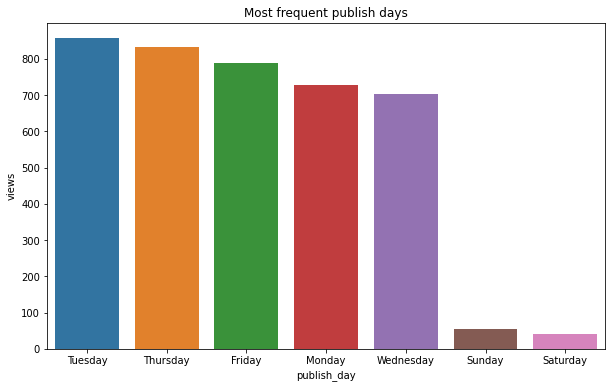

In [25]:
# Checking the day of the week having maximum publish date 
plt.figure(figsize=(10,6))
sns.barplot(x='publish_day',y='views',data=freq_rel_day)
plt.title('Most frequent publish days')

* **Most videos are published on Tuesday followed by Thursday.**

**Let's check the best publish day of the week with respect to average views**

In [26]:
# Publish day of the week with respect to average views

pop_rel_day=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

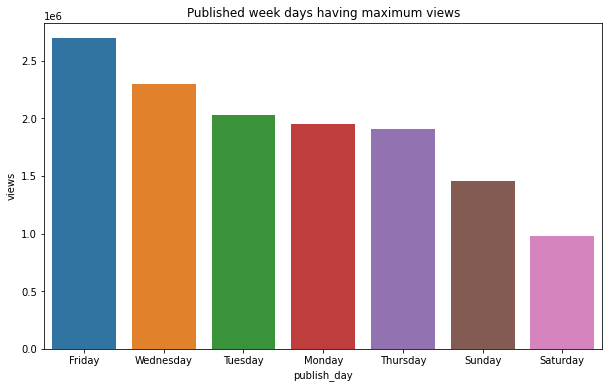

In [27]:
# Barplot to show week days having maximum views

plt.figure(figsize=(10,6))
plt.title('Published week days having maximum views')
sns.barplot(x='publish_day',y='views',data=pop_rel_day)

* **Videos published on Friday are more popular (i.e. have more average views) followed by wednesday.**

###**Let's explore publish_month column**

## Months having maximum average views

In [28]:
# Encoding of publish_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['publish_month']=df['publish_month'].map(month_dict)

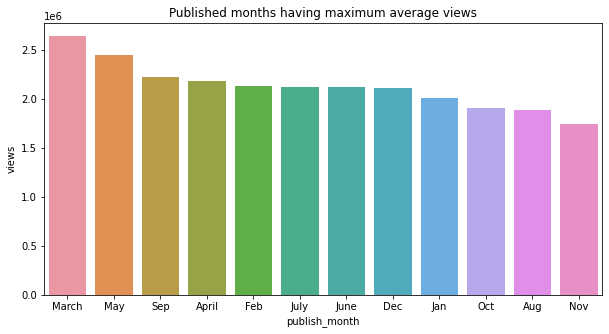

In [29]:
# Most popular publish month according to average Views
pop_rel_month=df[['publish_month','views']].groupby('publish_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

# Barplot showing months having maximum average views
plt.figure(figsize=(10,5))
plt.title('Published months having maximum average views')
sns.barplot(x='publish_month',y='views',data=pop_rel_month)

* **Videos released in March are more popular (i.e. have more average views) followed by May and Sep.**

###**Let's explore publish_year column.**

In [30]:
#checking years having frequent release 
freq_rel_year=df[['publish_year','views']].groupby('publish_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent publish years')

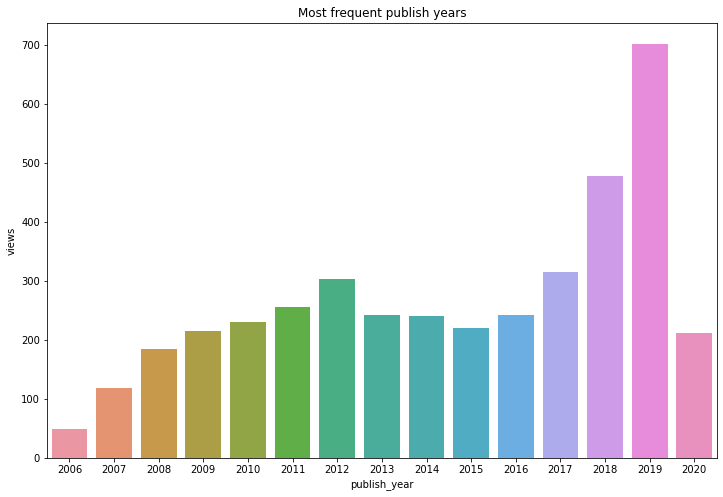

In [31]:
#Plotting the years having frequent release 
plt.figure(figsize=(12,8))
sns.barplot(x='publish_year',y='views',data=freq_rel_year)
plt.title('Most frequent publish years')

* **Most videos are published in 2019 followed by 2018 and 2017.**

##**Let's explore some numerical features.**

Skewness: 8.185744
Kurtosis: 98.737918


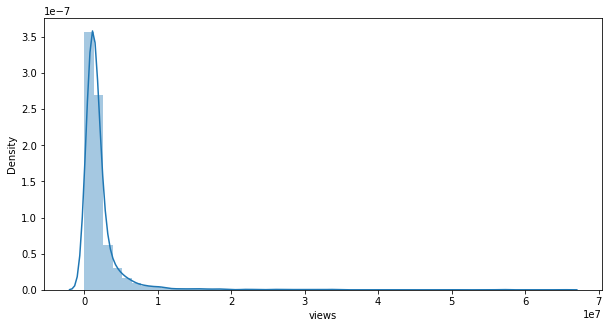

In [32]:
# Distplot to show distribution of views column

plt.figure(figsize=(10,5))
sns.distplot(df['views'])
print("Skewness: %f" % df['views'].skew())
print("Kurtosis: %f" % df['views'].kurt())

Skewness: 8.865357
Kurtosis: 143.035387


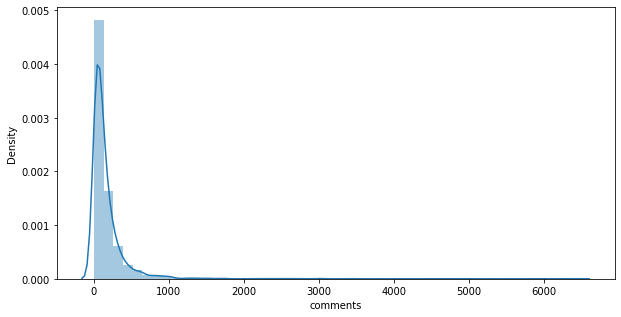

In [33]:
# Distplot to show distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'])
print("Skewness: %f" % df['comments'].skew())
print("Kurtosis: %f" % df['comments'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


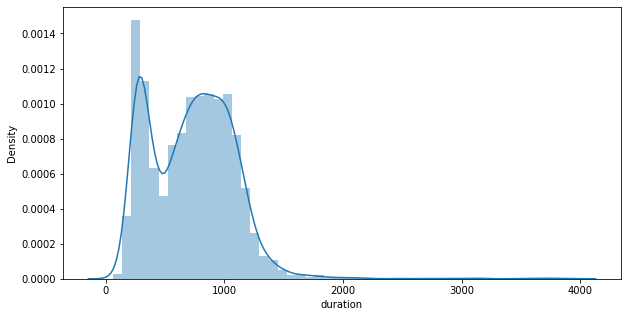

In [34]:
# Distplot to show distribution of duration column.

plt.figure(figsize=(10,5))
sns.distplot(df['duration'])
print("Skewness: %f" % df['duration'].skew())
print("Kurtosis: %f" % df['duration'].kurt())

#**It's time to do some Feature Enginnering.**

###**Feature Engineering on Speaker_1 column**

In [35]:
# Creating a column speaker_1_avg_views.

pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

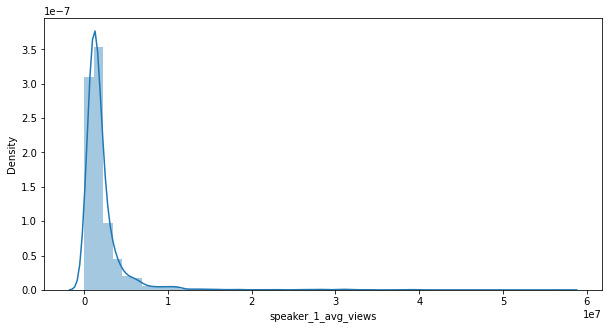

In [36]:
# Distribution of speaker_1_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

###**Feature Engineering on event column**

**The event column contains lots of similar values so let's combine them in a same category.**

In [37]:
# Printing unique event categories.

event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [38]:
# Creating new column called event category
df['event_category'] = 'Other'
# categorising each record into the new event_category column according to their event
for i in range(len(df)):
    if df['event'][i][0:5]=='TED20':
        df['event_category'][i] = 'TED2000s'
    elif df['event'][i][0:6]=='TED-Ed':
        df['event_category'][i] = 'TED-Ed'
    elif df['event'][i][0:5]=='TED19':
        df['event_category'][i] = 'TED1900s'
    elif df['event'][i][0:4]=='TEDx':
        df['event_category'][i] = "TEDx"
    elif df['event'][i][0:7]=='TED@BCG':
        df['event_category'][i] = 'TED@BCG'
    elif df['event'][i][0:4]=='TED@':
        df['event_category'][i] = "TED@"
    elif df['event'][i][0:8]=='TEDSalon':
        df['event_category'][i] = "TEDSalon"
    elif df['event'][i][0:9]=='TEDGlobal':
        df['event_category'][i] = 'TEDGlobal'
    elif df['event'][i][0:8]=='TEDWomen':
        df['event_category'][i] = 'TEDWomen'
    elif df['event'][i][0:6]=='TEDMED':
        df['event_category'][i] = 'TEDMED'
    elif df['event'][i][0:3]=='TED':
        df['event_category'][i] = 'TEDOther'

In [39]:
# Value counts of event_category

df.event_category.value_counts()

TED2000s     1178
TEDx          696
TED-Ed        561
TEDGlobal     516
TEDOther      349
TEDWomen      194
Other         144
TED@          128
TEDMED         92
TEDSalon       79
TED@BCG        59
TED1900s        9
Name: event_category, dtype: int64

* **There are 12 unique values in the event_category column.**
* **TED2000s category has maximum number of videos.**
* **Now, drop the event column.**

In [40]:
# Dropping event column

df=df.drop(columns='event')

###**Feature Engineering on available_lang column**

In [41]:
# Eval function applying on available_lang column

df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [42]:
# Creating a new feature num_of_lang

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

**Feature num_of_lang contains total number of available language for a particular video.**

**Now we can drop available_lang column**

In [43]:
# Dropping the available_lang column

df.drop(columns='available_lang',inplace=True)

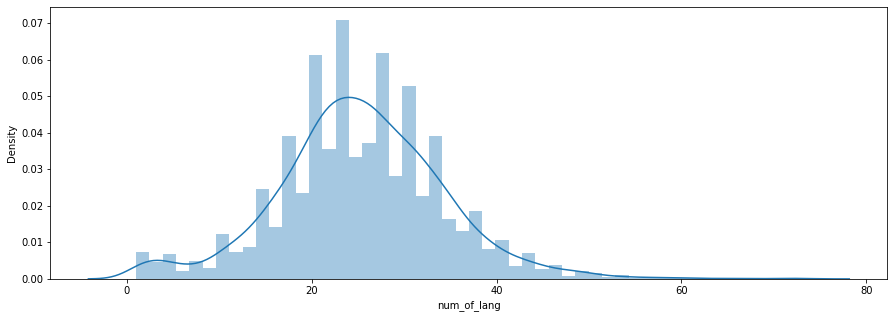

In [44]:
# Distplot to show distribution of num_of_lang column

sns.distplot(df['num_of_lang'])

###**Feature Engineering on topics column**

In [45]:
# Let's see what topics column contains

df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

* **The topics column contains the list of topic tags associated with each video.**

In [46]:
# Applying Eval funcion on topics column

df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

In [47]:
# Creating a new feature num_of_tags

df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

**Feature num_of_tags contains total number of topics for a particular video.**

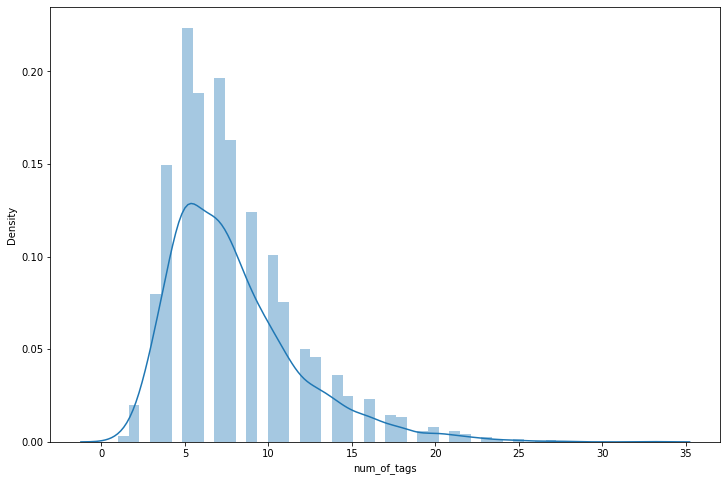

In [48]:
# Distplot to show distribution of num_of_tags feature

plt.figure(figsize=(12,8))
sns.distplot(df['num_of_tags'])

In [49]:
# Extracting the unique topics from topics list of each talk

unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

In [50]:
# Extracting the avg views with respect to each topic in another dict unique_topics_avg_view_dict

unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Storing the avg views with respect to topic for each talk

topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

In [51]:
# Printing topic wise average views feature

df['topics_wise_avg_views']

0       1750846
1       2290338
2       1915719
3       1642100
4       2904226
         ...   
4000    2134416
4001    2343639
4002    1805407
4003    1978146
4004    1877477
Name: topics_wise_avg_views, Length: 4005, dtype: int64

###**Feature Engineering on published_date column.**

**Let's create a new column called video_age which is the difference of current year and published year.**

In [52]:
df['video_age']=2021-df['publish_year']

In [53]:
# Now, drop published_date column

df=df.drop(columns='published_date')

###**Feature Engineering on related_talks column.**

In [54]:
# applying eval function on related_talks column

df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [55]:
# Let's see first row of related_talks column

df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

* **Related_talks column contains a dictionary with talk_id as key and video title as it's value.**
* **Let's create a new feature related_views which contains mean of the views of related talks for each video .**

In [56]:
# Creating a new feature called related_views

df['related_views'] = 0

In [57]:
# Extracting the value of related_talks

for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

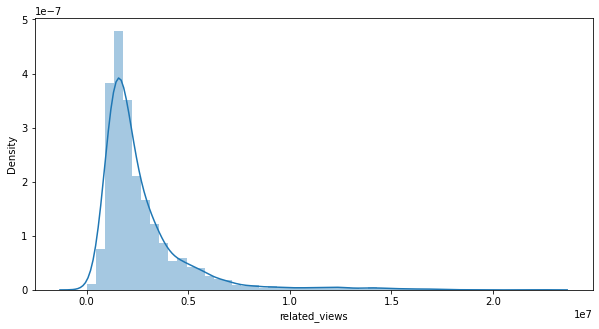

In [58]:
# Distplot to show the distribution of related_views column

plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

* **Related_views column is skewed normal distribution.**

#**Let's do some Data Cleaning.**

##**Imputing nan values of numerical columns using KNNImputer**

In [59]:
# Importing KNNImputer library to impute nan values

from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['duration','comments']])
df[['duration','comments']] = imputer.transform(df[['duration','comments']])

In [60]:
# Let's see if there are any nan values in duration and comments column

df[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

## Great! we have removed all null values from our numercal columns.

##**Let's check for outliers.**

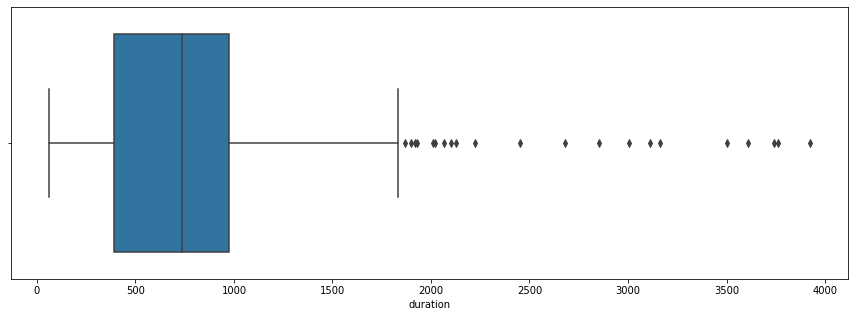

In [61]:
# Plotting boxplot for duration column

sns.boxplot(x=df['duration'])

## We have outliers in duration column.

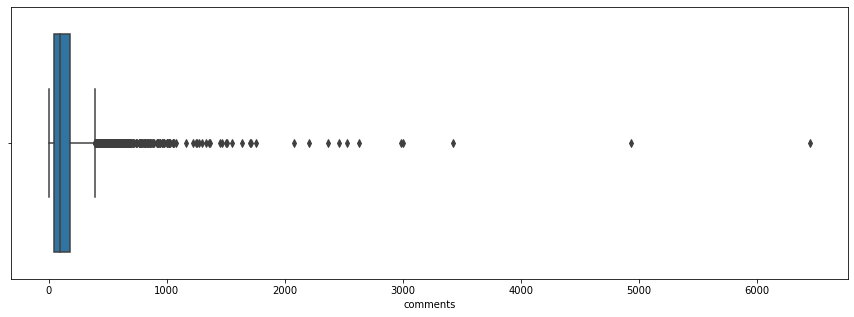

In [62]:
# Plotting boxplot for comments column

sns.boxplot(x=df['comments'])

## Comments column also has outliers.

##**Let's remove Outliers from our numerical columns.**

In [63]:
# Let's check the outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 293
description                0
duration                  21
event_category             0
num_of_lang              121
num_of_tags              116
publish_day                0
publish_month              0
publish_year               0
recorded_date              0
related_talks              0
related_views            300
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

* **We have outliers in few columns.**
* **Let's replace the outliers with the extreme values.**

In [64]:
# Replacing outliers with extreme values

for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','talk_id']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [65]:
# Let's check the outliers again

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 0
description              0
duration                 0
event_category           0
num_of_lang              0
num_of_tags              0
publish_day              0
publish_month            0
publish_year             0
recorded_date            0
related_talks            0
related_views            0
speaker_1                0
speaker_1_avg_views      0
talk_id                  0
title                    0
topics                   0
topics_wise_avg_views    0
transcript               0
video_age                0
views                    0
dtype: int64

In [66]:
df.dtypes

talk_id                  float64
title                     object
speaker_1                 object
views                    float64
recorded_date             object
comments                 float64
duration                 float64
topics                    object
related_talks             object
description               object
transcript                object
publish_day               object
publish_month             object
publish_year               int64
speaker_1_avg_views      float64
event_category            object
num_of_lang              float64
num_of_tags              float64
topics_wise_avg_views    float64
video_age                  int64
related_views            float64
dtype: object

* **Great, now we don't have any outliers.**

#**Let's do Feature Selection**

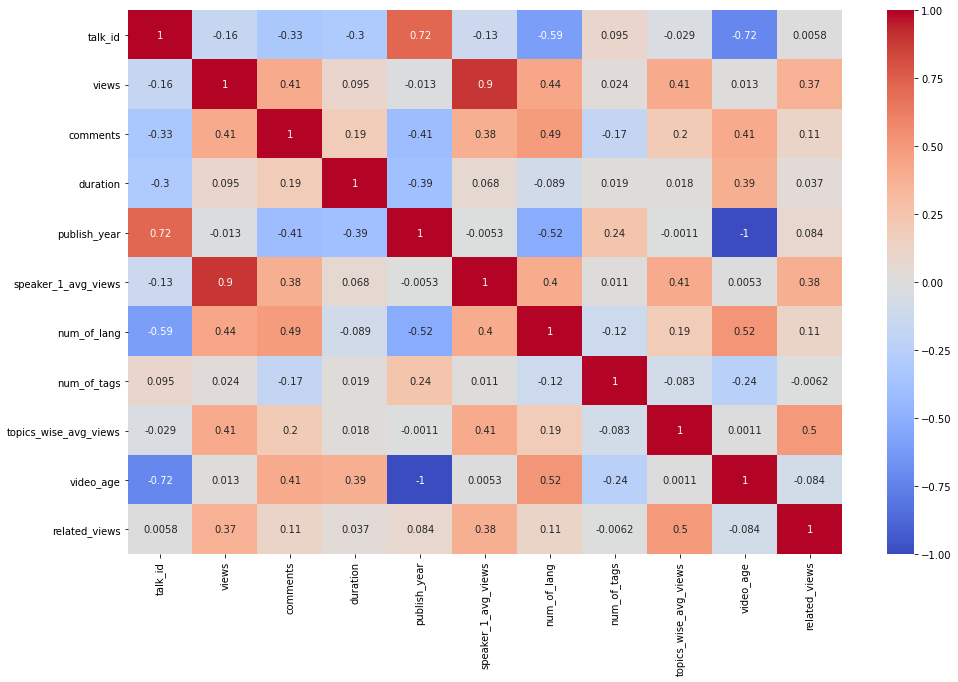

In [67]:
# Correlation matrix between numerical features.

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

**Taking important features from our dataframe.**

In [68]:
# Creating new dataframe of selected features

df1=df[['views','comments','duration','num_of_lang','num_of_tags','publish_day','publish_month','video_age',
        'related_views','event_category','speaker_1_avg_views','topics_wise_avg_views']]

**Before doing one hot encoding, let's check shape of our dataframe.**

In [69]:
# Printing shape of df1

df1.shape

(4005, 12)

**Let's create final dataframe by doing one hot encoding using get_dummies function.**

In [70]:
# Creating final dataframe for our prediction models.

final_df=pd.get_dummies(df1)
final_df.shape

(4005, 40)

* **Now, we have around 40 features after one hot encoding.**


##**Let's do Feature selection on the basis of p-value.**

In [71]:
# Importing feature selection library

from sklearn.feature_selection import f_regression

**Separate independent and dependent features.**

In [72]:
# Separating independent and dependent features.

X=final_df.drop(columns=['views'])
y=final_df['views']

In [73]:
# Printing f_scores for independent features.

f_scores = f_regression(X, y)
f_scores

(array([7.93157493e+02, 3.63920086e+01, 9.43117088e+02, 2.22138034e+00,
        7.26280093e-01, 6.34241154e+02, 1.61894391e+04, 8.21343686e+02,
        4.93457071e+01, 2.14095360e+00, 1.69801520e+01, 1.32688878e+01,
        4.22782469e+00, 1.54608611e+00, 5.17596240e-03, 4.42937898e+00,
        5.29481408e-01, 3.19042540e+00, 9.10855944e-01, 3.61273001e+00,
        1.59320065e+00, 7.00546927e-01, 1.20164944e+01, 3.34840829e+00,
        3.24993722e+00, 6.69041425e+00, 1.59197663e+00, 4.59792903e+01,
        4.62916792e-01, 3.10594880e+00, 7.04017302e+01, 1.43088801e+00,
        1.74686740e+00, 1.47543441e+00, 7.34995399e-04, 1.08610825e+00,
        8.31622635e-01, 1.94150044e-02, 1.71138588e+01]),
 array([2.27765837e-159, 1.75975910e-009, 3.67017071e-186, 1.36190106e-001,
        3.94142602e-001, 4.87581533e-130, 0.00000000e+000, 1.81039118e-164,
        2.51061953e-012, 1.43491232e-001, 3.85368618e-005, 2.73265521e-004,
        3.98310726e-002, 2.13786984e-001, 9.42649939e-001, 3.53875

Text(0.5, 1.0, 'P-value scores for numerical features')

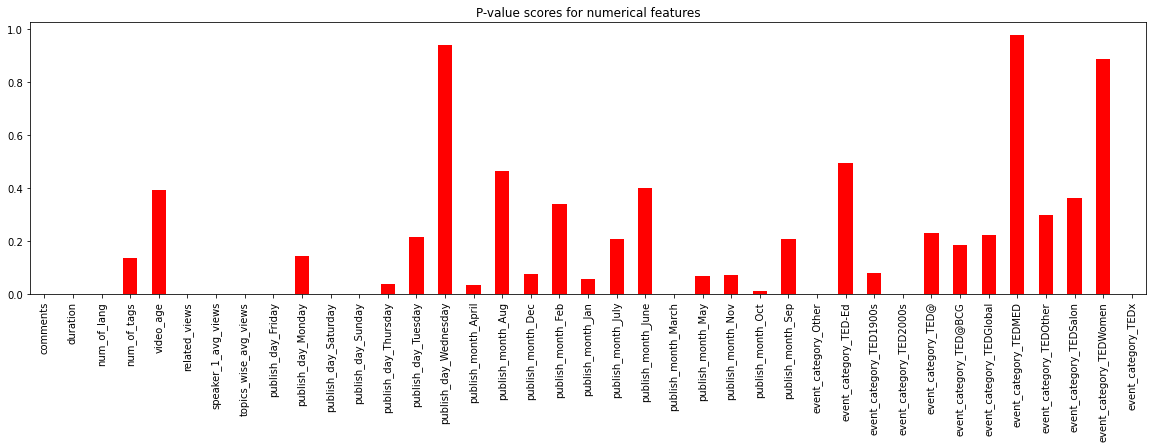

In [74]:
# Plotting p-valuesfor numerical features.

plt.rcParams['figure.figsize'] = (20, 5)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red')
plt.title('P-value scores for numerical features')

* **From this bar plot we can drop some features which have high p_values.**

In [75]:
# List of important features.

imp_feat=['comments', 'duration', 'num_of_lang', 'num_of_tags',
       'related_views','publish_day_Friday','speaker_1_avg_views','topics_wise_avg_views',]

In [76]:
# Creating dataframe with selected important features.

df_imp = final_df[imp_feat]

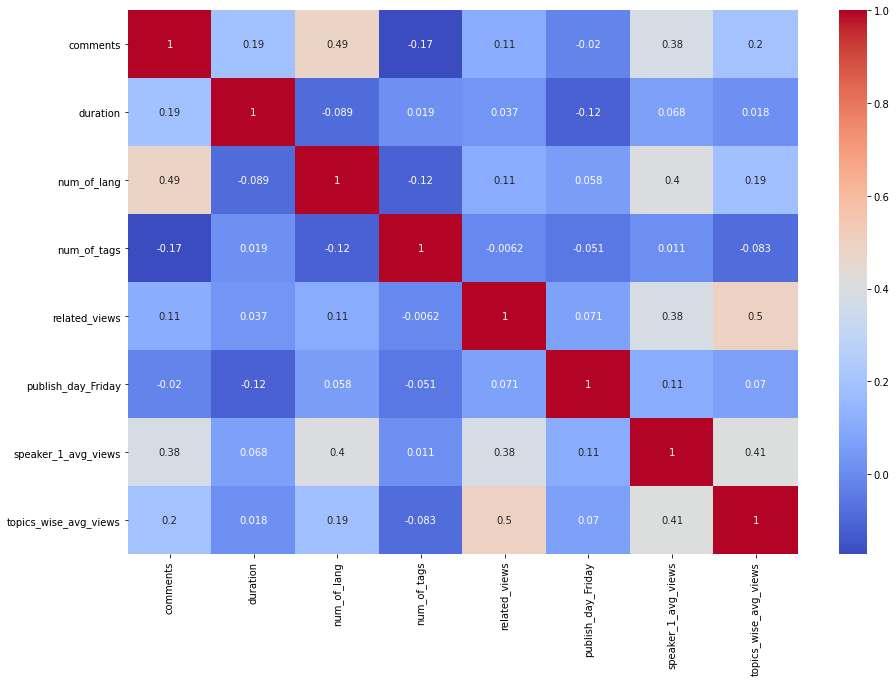

In [77]:
# Lets look at the correlation matrix.

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.heatmap(df_imp.corr(),annot=True, cmap='coolwarm')

##**Let's apply train test split**

In [78]:
# Importing library train_test_split

from sklearn.model_selection import train_test_split
X=df_imp
y=df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121212)

###**Let's do Data Scaling**

In [79]:
# Importing StandardScaler from sklearn library

from sklearn.preprocessing import StandardScaler

# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Let's build a baseline model and then we can improve from there.**

##**Linear regression model.**

In [80]:
# Importing library

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
# Fitting the data

lin_reg = LinearRegression().fit(X_train, y_train)

In [82]:
# Predicting the values for test set

y_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [83]:
# Calculating MSE and RMSE for test data set

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

MSE is 239214092567.47784
RMSE is 489095.1774117977


In [84]:
# Printing MAE for training and test set.

print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 262131.07
Test MAE: 275130.27


* **Our features are not following linear relationship but still this model is giving a satisfactory score.**

**Let's improve the results of our baseline model.**

##**Random Forest Regressor**

In [85]:
# Importing libraries.

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor

In [86]:
# Fitting the data

rf = RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 128964.28
Test MAE: 226119.23


* **It's not a good score but we can improve by doing some hyperparameter tuning.**

**Hyperparameter Tuning using Randomized Search CV**

In [87]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [88]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [30,50,80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150,200,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50,60,80]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [89]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8, total=   0.2s
[CV] n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8, total=   0.2s
[CV] n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8, total=   0.2s
[CV] n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8, total=   0.2s
[CV] n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=30, min_samples_split=50, min_samples_leaf=80, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=80, max_depth=8, total=   0.4s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=80, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=80, max_depth=8, total=   0.4s
[CV] n_estimators=80, min_samples_split=150, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [90]:
# Let's see which set of hyperparameters are optimal.

rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**So, above are the best hyperparameters for our model.**

In [91]:
# Now, calculating MAE for training and test set.

y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 206090.23
Test MAE: 238771.22


In [92]:
# Importing r2_score
from sklearn.metrics import r2_score

# Calculating R-squared value.

y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8468267194462228
For test set the R_Squared for RFforest is 0.8100077624740115 and adjusted R_Squared is 0.8096273976341196


**So, according to r2_score value our model performed very well.**

**Let's plot the feature importance score w.r.t. RF model**

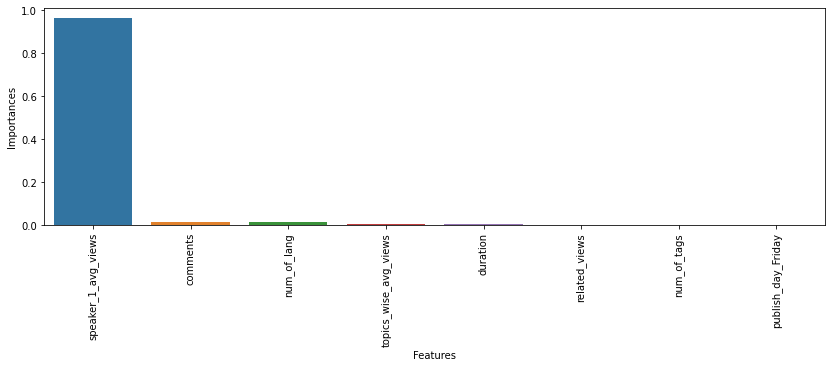

In [93]:
# Barplot to show important feature in RF model for prediction.

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

##**XGboost regressor**

In [94]:
# Importing library

from xgboost import XGBRegressor

In [95]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [96]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.05)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[07:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.4s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[07:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[07:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[07:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[07:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                 

In [97]:
# Let's see which set of hyperparameters are optimal

xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=40,
             min_samples_split=100, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [98]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8899478512548324
For test set the R_Squared for XGBoost is 0.811167369138794 and adjusted R_Squared is 0.8107893258337665


In [99]:
# Calculating MAE for training and test set.

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 182063.58
Test MAE: 238606.17


**Let's plot the feature importance score w.r.t. XGBregressor model**

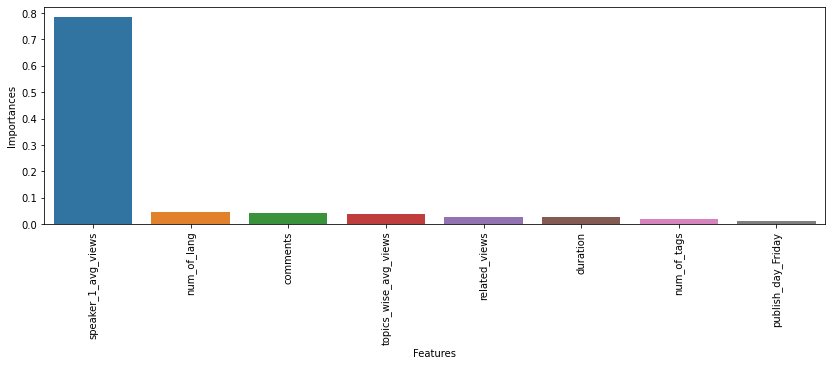

In [100]:
# Barplot to show important features.

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

##**ExtraTrees Regressor.**

In [101]:
# Importing library.

from sklearn.ensemble import ExtraTreesRegressor

In [102]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [103]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor()

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   0.2s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [104]:
# Let's see optimal set of hyperparameters for this model.

et_optimal_model = et_random.best_estimator_
et_optimal_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=6, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=40,
                    min_samples_split=50, min_weight_fraction_leaf=0.0,
                    n_estimators=80, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [105]:
# Calculating MAE for training and test set

y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 223170.45
Test MAE: 245983.11


In [106]:
# Making predictions for test data and also calculating r2_score

y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8468267194462228
For test the R_Squared for ExtraTreesRegressor is 0.8054054922243943 and adjusted R_Squared is 0.8050159136302489


**Let's plot the feature importance score w.r.t. ExtraTreesRegressor model**

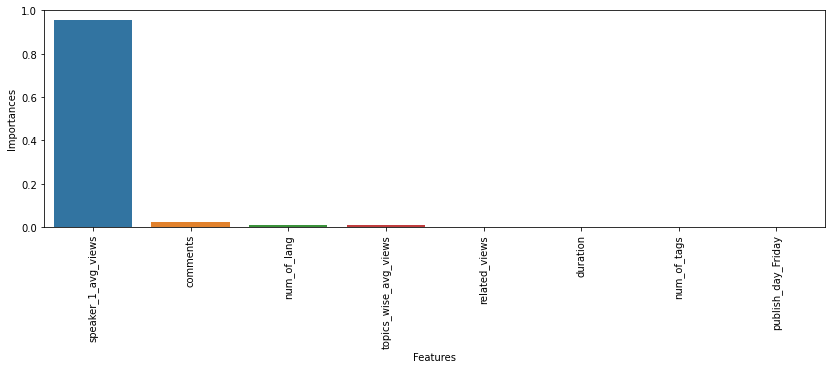

In [107]:
# Barplot to show important features w.r.t. ExtraTreesRegressor model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

* **In all the models speaker_1_avg_views is impacting the much.**

##**The ML regressor models that i am using are :**

* Support Vector Regressor
* Random Forest Regressor
* Extra Tree Regressor
* Gradient Boosting Regressor
* XGB Regressor

* **Let's try all these models together and store the scores in a new dataframe.**

In [108]:
# Importing necessary libraries

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [109]:
# Instantiating all these models

models = [
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=120, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, random_state=2019, min_samples_leaf=2, min_samples_split=6)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()]         
         ]

In [110]:
# Fitting the models

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["Train_MAE"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["Test_MAE"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[07:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
# Creating a dataframe of all results.

results_df = pd.DataFrame(model_data)
results_df

,Name,Train_MAE,Test_MAE,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,SVR:,833770.618938,837542.022049,-0.067410,-0.074605,1.146287e+06
1,RandomForest,131360.782316,227706.723572,0.924452,0.817545,4.723310e+05
2,ExtraTreeRegressor :,124276.202226,212617.799775,0.900079,0.804734,4.886320e+05
3,GradientBoostingRegressor:,196819.130625,250885.184672,0.880048,0.806250,4.867322e+05
4,XGBRegressor:,195302.873197,244752.564000,0.878345,0.811003,4.807241e+05


#**Conclusion**

* **XGBRegressor is the best performer in terms of MAE while SVR is the worst performer.**
* **RandomForest gets overfitted on default parameters.**
* **In all the features speaker_1_avg_views is most important.**
* **Duration of talk is not correlated to the number of views however, longest talks belong to the least viewed category.**
* **Increasing the number of languages the talk is available in, increases the views of the TED talks.**